In [1]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import time

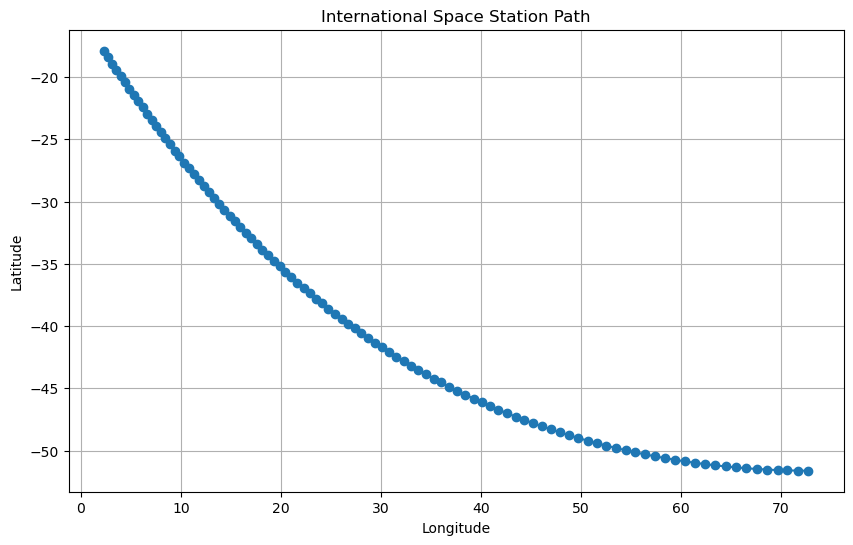

In [2]:
url = "http://api.open-notify.org/iss-now.json"
data_points = []

for _ in range(100):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        timestamp = datetime.fromtimestamp(data['timestamp'])
        latitude = float(data['iss_position']['latitude'])
        longitude = float(data['iss_position']['longitude'])
        data_points.append((timestamp, latitude, longitude))
    time.sleep(10)  # Wait for 10 seconds between API calls

latitudes = [point[1] for point in data_points]
longitudes = [point[2] for point in data_points]

plt.figure(figsize=(10, 6))
plt.plot(longitudes, latitudes, '-o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('International Space Station Path')
plt.grid(True)
plt.show()